In [1]:
##########################  Análisis Estadístico ##########################

#-----Proyecto IMDb Taller de Modelacion 2------
#-----Arturo Flores Callejas -------------------
#-----Analisis exploratorio --------------------

#Importamos las librerias 
import psycopg2 as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns


In [2]:
##Creamos un engine, con las credenciales necesarias para la conexión a postgres
engine = pg.connect("dbname='IMDB' user='postgres' host='localhost' port='5432' password='Orutra02'")

##Creamos un dataframe con una query
abt = pd.read_sql_query('select * from "abt_2"',con=engine) #ABT FINAL

C:\Users\afcal\AppData\Local\Temp\ipykernel_2112\2483126002.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  abt = pd.read_sql_query('select * from "abt_2"',con=engine) #ABT FINAL


In [3]:
##Vemos la información de las columnas de abt
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210569 entries, 0 to 210568
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          210569 non-null  object 
 1   primarytitle    210569 non-null  object 
 2   isadult         210569 non-null  object 
 3   decade          210569 non-null  object 
 4   runtimeminutes  190521 non-null  float64
 5   numvotes        210569 non-null  int64  
 6   genres1         205017 non-null  object 
 7   cnt_genres      205017 non-null  float64
 8   cnt_types       210569 non-null  int64  
 9   cnt_region      210569 non-null  int64  
 10  cnt_titles      210569 non-null  int64  
 11  target          210569 non-null  int64  
 12  principalcrew   210569 non-null  object 
 13  departments     210569 non-null  object 
 14  othercrew       210569 non-null  object 
 15  cnt_continents  210242 non-null  float64
 16  continent_code  208673 non-null  object 
 17  topdirecto

In [4]:
##Obtenemos los nombres las las columnas categóricas y numéricas
 
col_num=abt.select_dtypes(exclude=['object']).columns.tolist() ## col_num=numéricas  

col_cat=abt.select_dtypes(['object']).columns.tolist() ## col_cat=categóricas


In [5]:
abt[col_cat]=abt[col_cat].replace('\\N', np.nan)

In [6]:
## Usamos una expresión regular simple para sustituir \N de las columnas categoricas
abt[col_cat]=abt[col_cat].replace('\\N', np.nan)

## Usamos fillina  para sustituir \N de las columnas numericas
abt = abt.fillna(value=np.nan)

# Visualiszación
#   print(abt)

##########################  runtimeminutes ########################## 


count    190521.000000
mean         96.169404
std         213.520202
min           2.000000
25%          82.000000
50%          92.000000
75%         105.000000
max       59460.000000
Name: runtimeminutes, dtype: float64

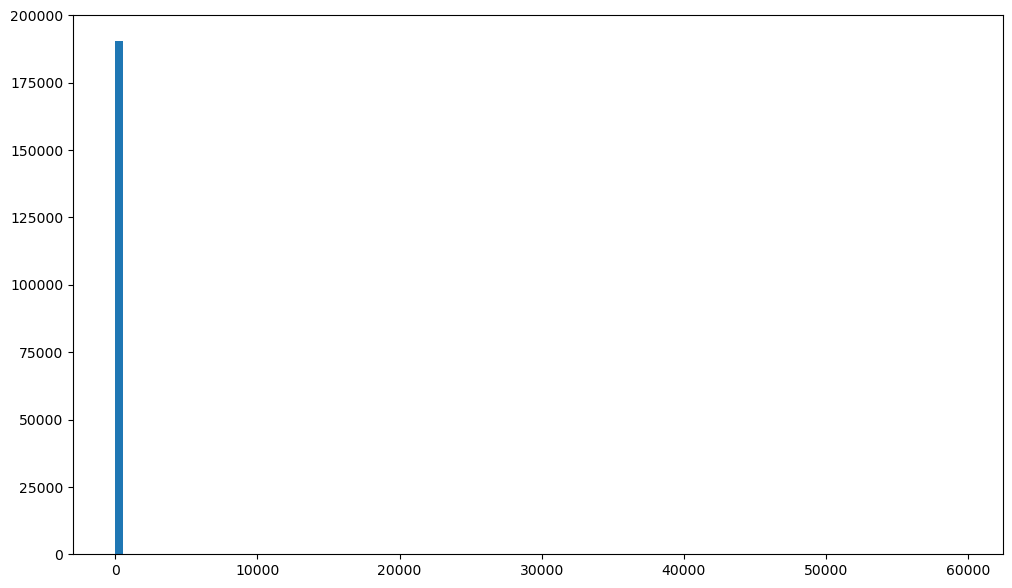

##########################  numvotes ########################## 


count    2.105690e+05
mean     4.520665e+03
std      4.076493e+04
min      5.000000e+00
25%      1.900000e+01
50%      6.700000e+01
75%      3.660000e+02
max      2.693284e+06
Name: numvotes, dtype: float64

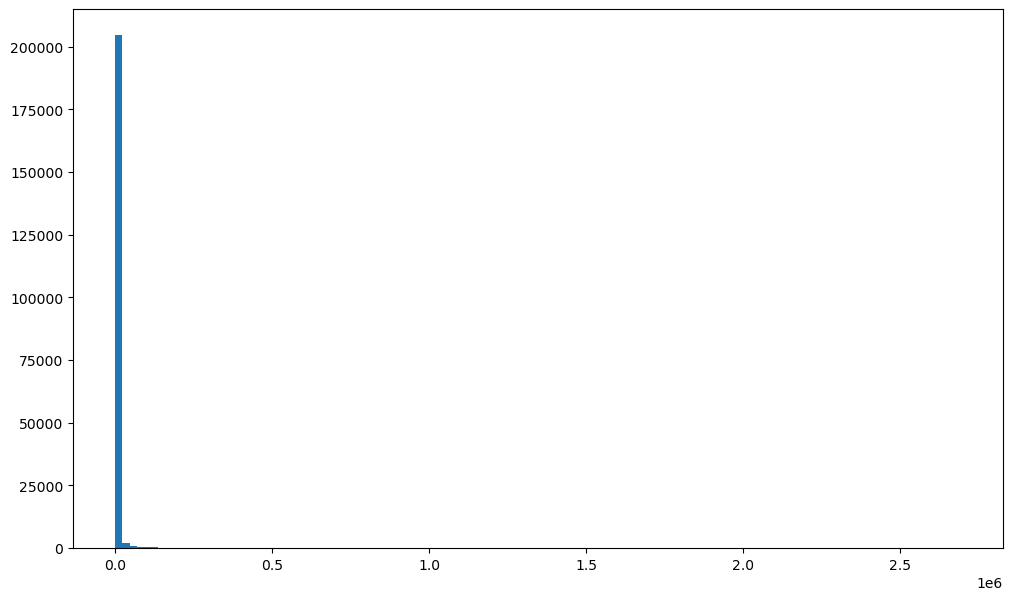

##########################  cnt_genres ########################## 


count    205017.000000
mean          1.742485
std           0.819800
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: cnt_genres, dtype: float64

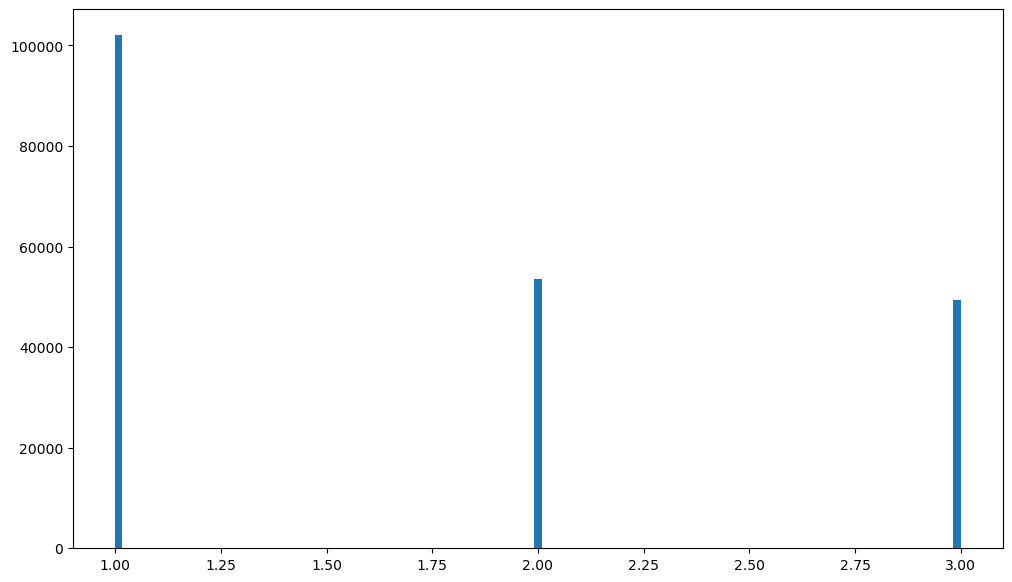

##########################  cnt_types ########################## 


count    210569.000000
mean          2.123907
std           0.942171
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           8.000000
Name: cnt_types, dtype: float64

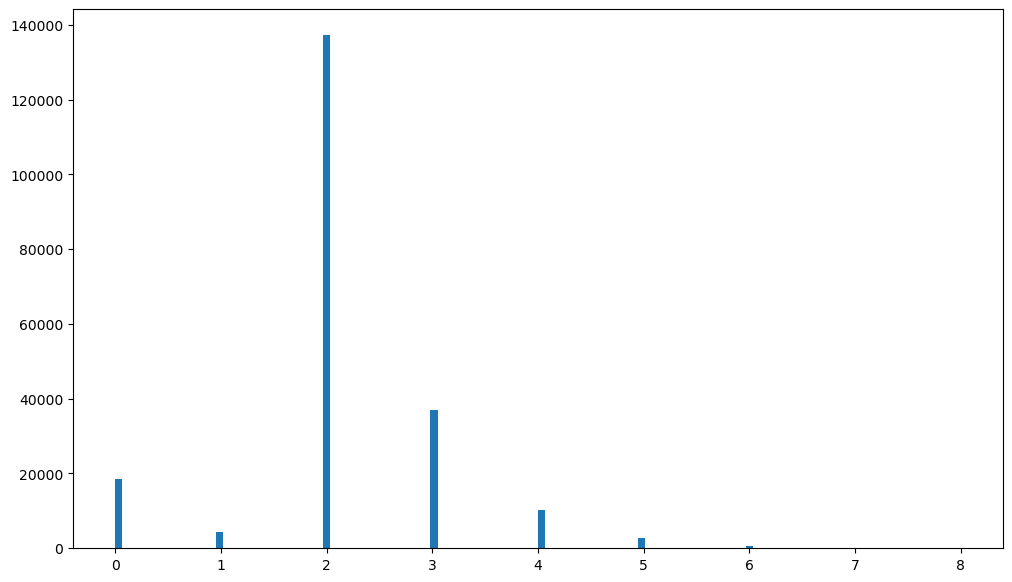

##########################  cnt_region ########################## 


count    210569.000000
mean          5.411490
std           8.006098
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max         104.000000
Name: cnt_region, dtype: float64

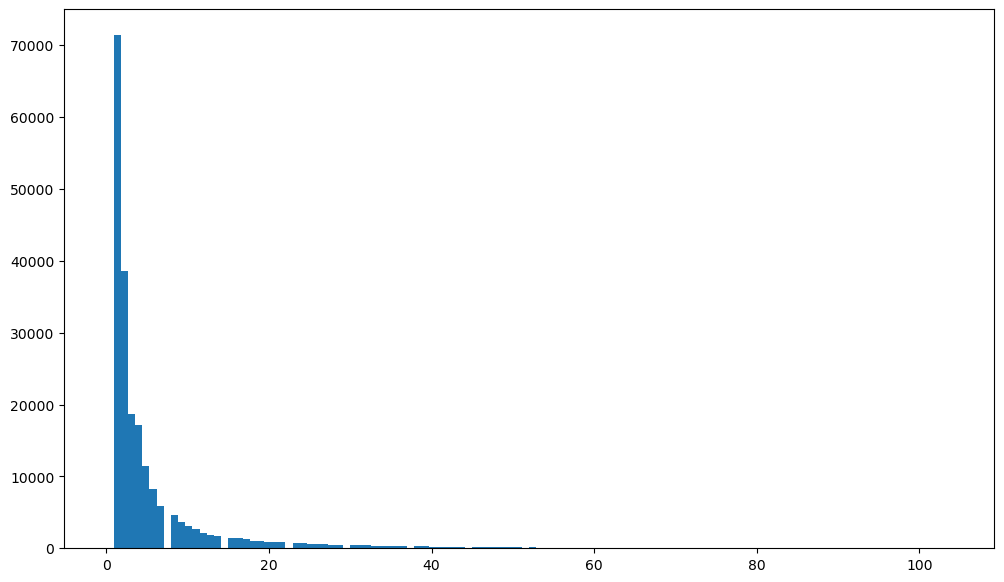

##########################  cnt_titles ########################## 


count    210569.000000
mean          4.067641
std           5.666499
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          94.000000
Name: cnt_titles, dtype: float64

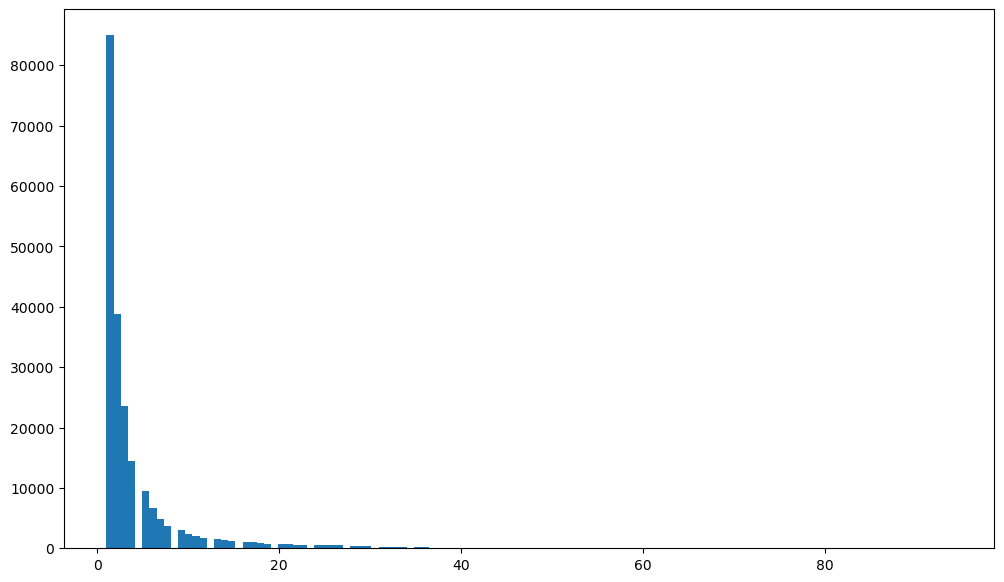

##########################  target ########################## 


count    210569.000000
mean          0.105196
std           0.306806
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

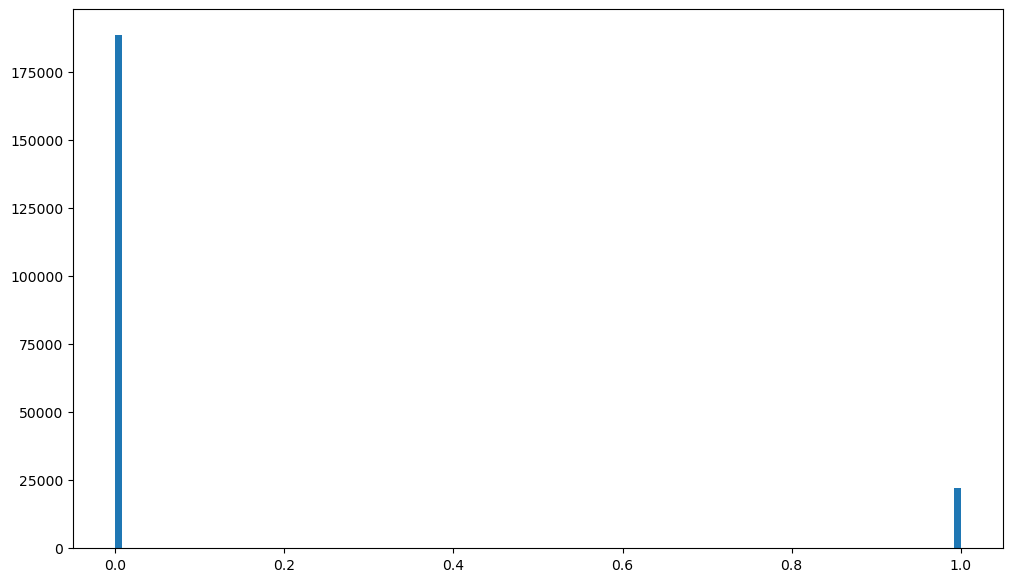

##########################  cnt_continents ########################## 


count    210242.000000
mean          2.162056
std           1.380373
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: cnt_continents, dtype: float64

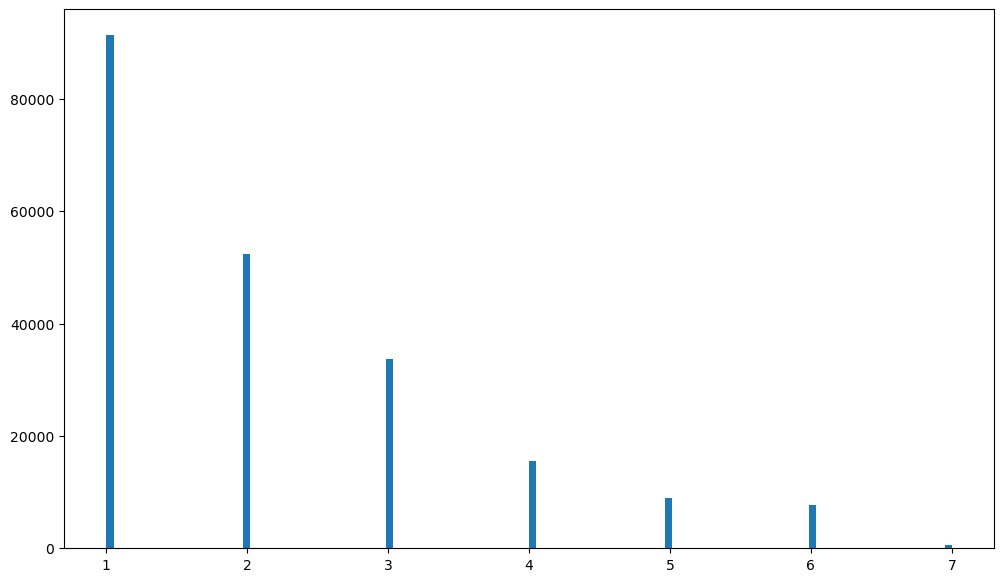

In [7]:
##Obtenemos métricas y los histogramas de las variables numéricas para analizar comportamientos
for i in col_num:
    print('##########################  %s ########################## '%i)
    display(abt[i].describe())
    plt.rcParams['figure.figsize']=(12,7)
    plt.hist(abt[i].dropna(), bins= int(2*(abt[i].dropna().shape[0]**(1/3))))
    plt.show()
    
## Conclusiones de la visualización anterior para var numericas. 
## runtimeMinutes Necesita tratamiento de outliers
## numvotes Necesita tratamiento de outliers
## cnt_genres Todos los datos se acumulan en tres valores, ie, es mejor tomarla como var categórica
## cnt_types Todos los datos se acumulan en 9 valores, ie, es mejor tomarla como var categórica
## cnt_region Parece ser un comportamiento exponencial
# cnt_titles Parece ser un comportamiento exponencial
# target Al ser una variable binomial solo toma dos valores y es mejor tomarla como var catagórica
# cnt_continents Solo se agrupa en 7 valores, mejor tomarla como var categórica

In [8]:
## Convertimos las varibles numericas que se acumulan en pocos valores, a categóricas
abt['cnt_continents']=abt['cnt_continents'].astype('object')

abt['cnt_genres']=abt['cnt_genres'].astype('object')

abt['cnt_types']=abt['cnt_types'].astype('object')

abt['target']=abt['target'].astype('object')

col_num=abt.select_dtypes(exclude=['object']).columns.tolist()

col_cat=abt.select_dtypes(['object']).columns.tolist()

##########################  runtimeminutes ########################## 


count    190521.000000
mean         96.169404
std         213.520202
min           2.000000
25%          82.000000
50%          92.000000
75%         105.000000
max       59460.000000
Name: runtimeminutes, dtype: float64

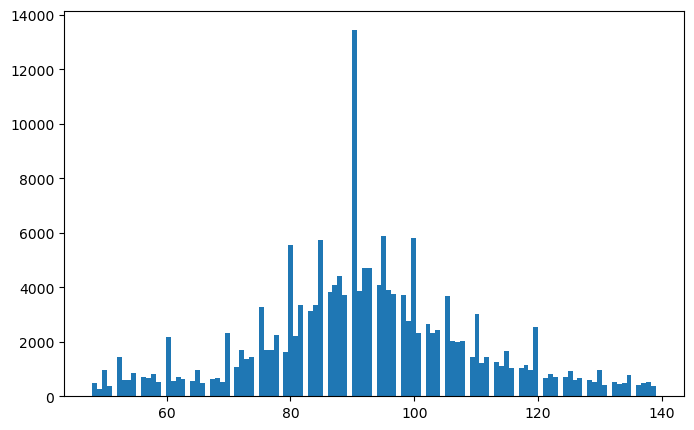

##########################  numvotes ########################## 


count    2.105690e+05
mean     4.520665e+03
std      4.076493e+04
min      5.000000e+00
25%      1.900000e+01
50%      6.700000e+01
75%      3.660000e+02
max      2.693284e+06
Name: numvotes, dtype: float64

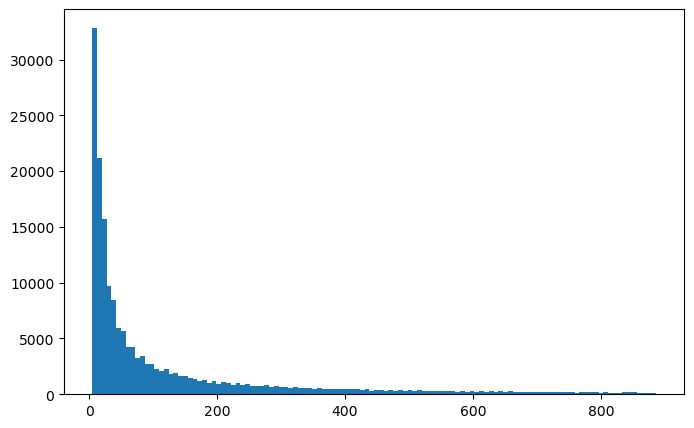

##########################  cnt_region ########################## 


count    210569.000000
mean          5.411490
std           8.006098
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max         104.000000
Name: cnt_region, dtype: float64

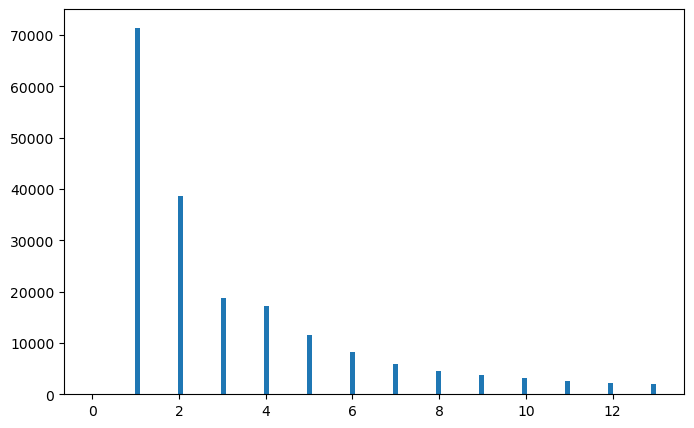

##########################  cnt_titles ########################## 


count    210569.000000
mean          4.067641
std           5.666499
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          94.000000
Name: cnt_titles, dtype: float64

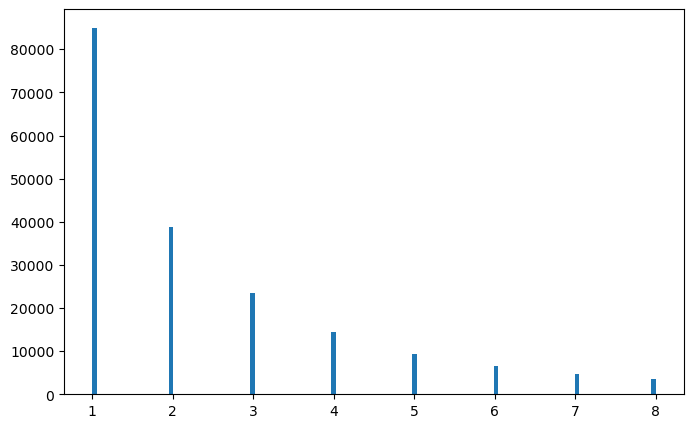

In [9]:
## Obtenemos la distribución excluyendo los outliers
for i in col_num:
    print('##########################  %s ########################## '%i)
    display(abt[i].describe())
    plt.rcParams['figure.figsize']=(8,5)
    Q1 = abt[i].quantile(0.25)
    Q3 = abt[i].quantile(0.75)
    IQR = Q3 - Q1
    parm=1.5
    filter = (abt[i] >= Q1 - parm * IQR) & (abt[i] <= Q3 + parm *IQR)
    plt.hist(abt.loc[filter][i].dropna(),   bins= int(2*(abt[i].dropna().shape[0]**(1/3))))
    plt.show()
    
## Conclusiones de la visualización anterior para var numericas. 
## Notemos que ahora las variables runtimeMinutes y numVotes se aprecia mucho mejor su distrib
## runtimemiutes parece distrib normal 
## numvotes se comporta exponencial 
## para cnt_titles y cnt_region era una mejor visualizacion con otuliers pero podemos cambiar la escala del eje x  

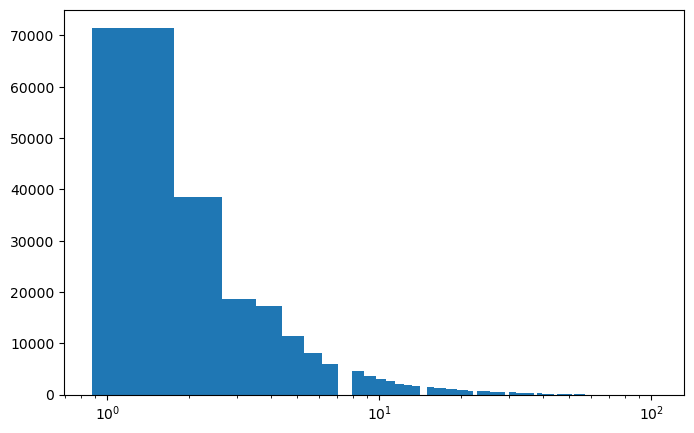

In [10]:
## Cambio de escala para cnt_region
plt.hist(abt['cnt_region'].dropna(), bins=int(2*(abt['cnt_region'].dropna().shape[0]**(1/3))) )
plt.xscale('log')
plt.show()


##########################  runtimeminutes ########################## 


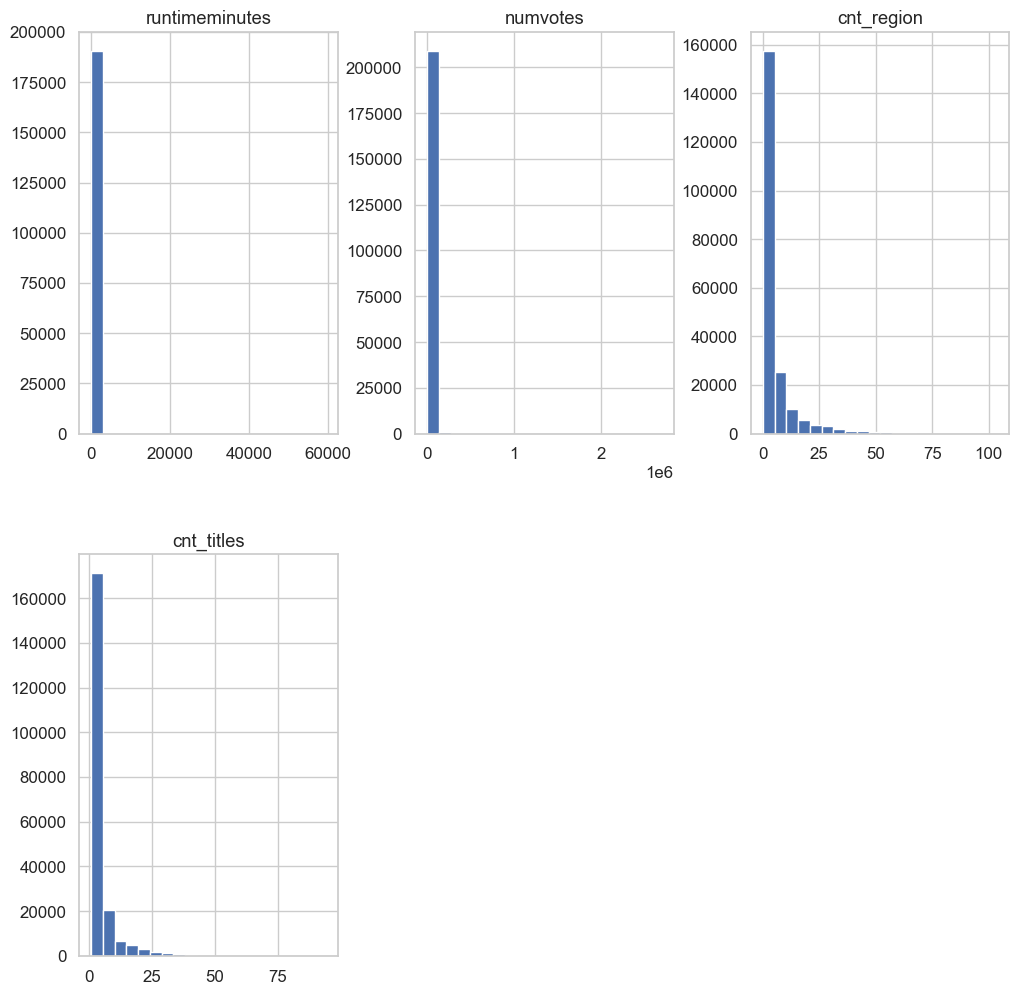

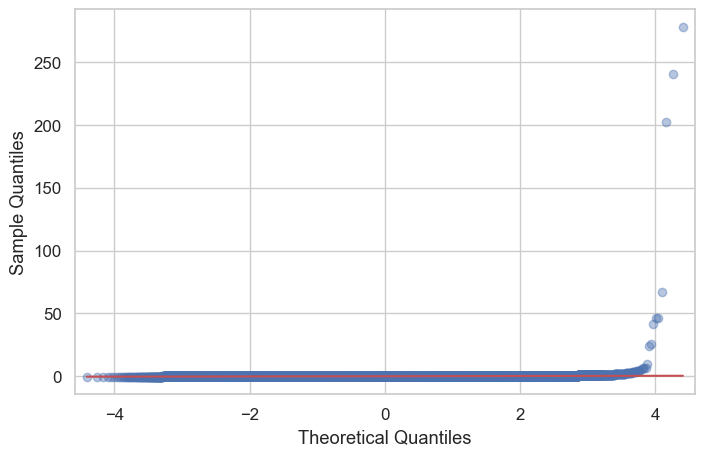

##########################  numvotes ########################## 


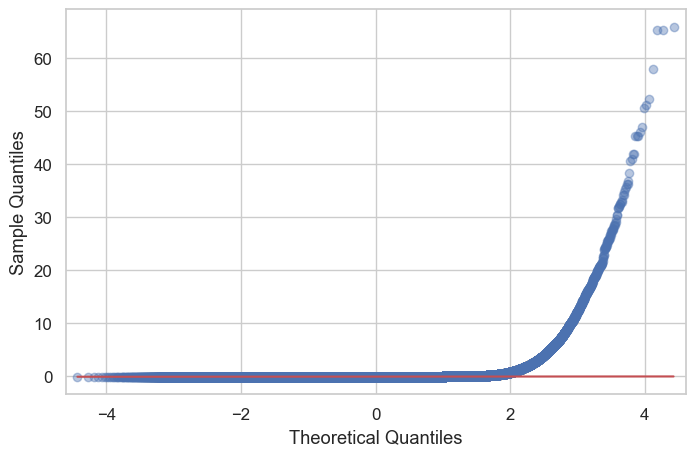

##########################  cnt_region ########################## 


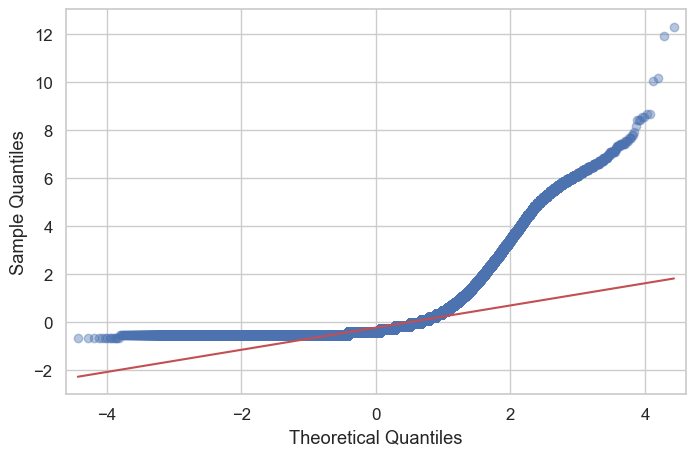

##########################  cnt_titles ########################## 


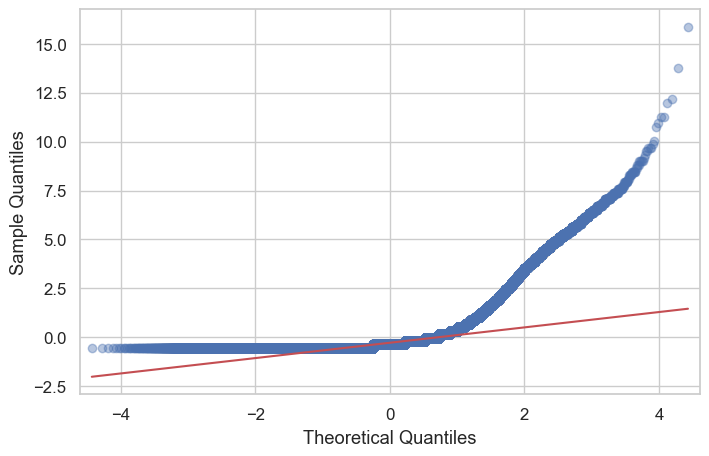

In [11]:
## Histogramas de vr numericas con seaborn 

## Formato de los plots
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

## Aquí se hacen los histogramas, de todas las columnas numéricas
abt[col_num].hist(bins=20, figsize=(12, 12), layout=(2,3));

## Libreria para estudiar como se distribuyen las variables usando qq-plots
import statsmodels.api as sm

## qq_plots de var num, si los registros de color azul se apegan a los rojos, entonces se comporta cercano 
## a la normalidad
for i in col_num:
    print('##########################  %s ########################## '%i)
    sm.qqplot( abt[i].dropna(), fit   = True, line  = 'q', alpha = 0.4, lw    = 2)
    plt.show()

##########################  runtimeminutes ########################## 


count    190521.000000
mean         96.169404
std         213.520202
min           2.000000
25%          82.000000
50%          92.000000
75%         105.000000
max       59460.000000
Name: runtimeminutes, dtype: float64

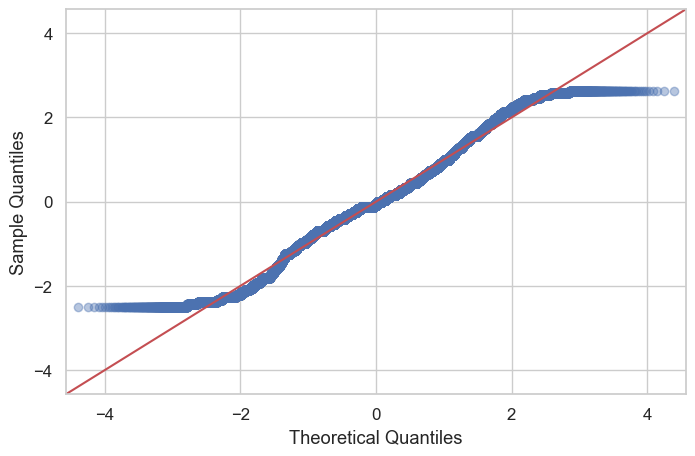

##########################  numvotes ########################## 


count    2.105690e+05
mean     4.520665e+03
std      4.076493e+04
min      5.000000e+00
25%      1.900000e+01
50%      6.700000e+01
75%      3.660000e+02
max      2.693284e+06
Name: numvotes, dtype: float64

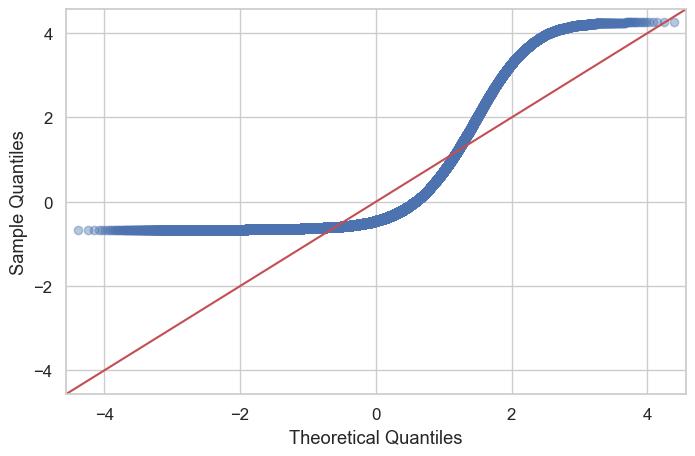

##########################  cnt_region ########################## 


count    210569.000000
mean          5.411490
std           8.006098
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max         104.000000
Name: cnt_region, dtype: float64

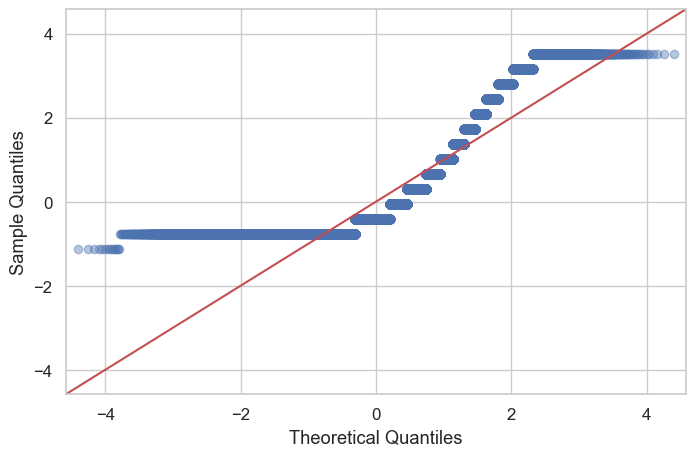

##########################  cnt_titles ########################## 


count    210569.000000
mean          4.067641
std           5.666499
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          94.000000
Name: cnt_titles, dtype: float64

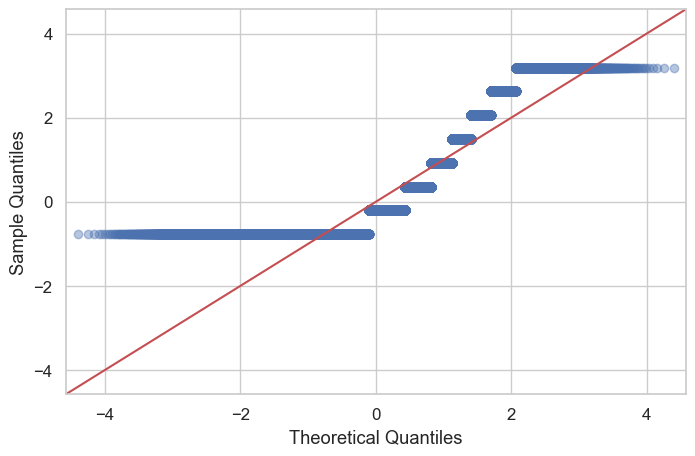

In [12]:
## Prueba de visualización removiendo outliers
for i in col_num:
    print('##########################  %s ########################## '%i)
    display(abt[i].describe())
    plt.rcParams['figure.figsize']=(8,5)
    Q1 = abt[i].quantile(0.25)
    Q3 = abt[i].quantile(0.75)
    IQR = Q3 - Q1
    filter = (abt[i] >= Q1 - 1.5 * IQR) & (abt[i] <= Q3 + 1.5 *IQR)
    sm.qqplot( abt.loc[filter][i].dropna(), fit   = True, line  = '45', alpha = 0.4, lw    = 2)    
    plt.show()
    
    
    ## Notemos que únicamente runtimeminutes se comporta de forma normal 

C:\Users\afcal\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


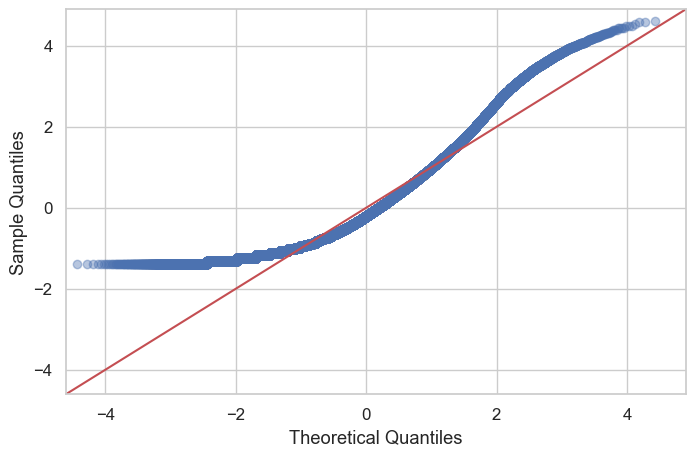

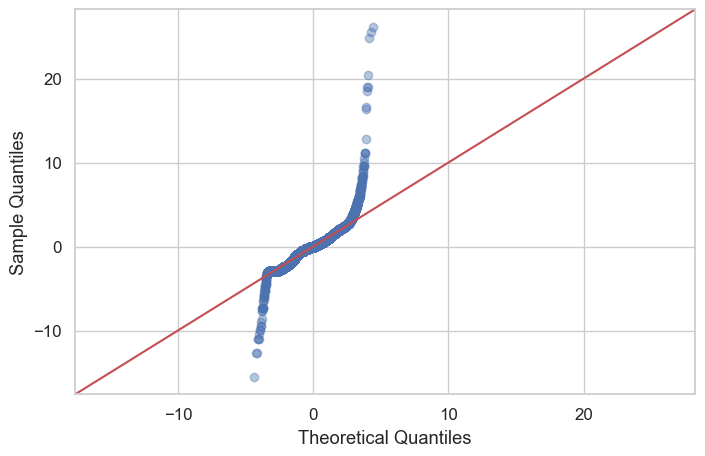

In [13]:
## Apliquemos una transformacion log a las variables y observemos su comportamiento 
abt_transform=abt.copy()

## Se aplica la transformacion log
abt_transform[col_num]=np.log(abt_transform[col_num])

## qq-plots con numvotes transformado 
sm.qqplot(abt_transform['numvotes'].dropna(), fit   = True, line  = '45', alpha = 0.4, lw    = 2)
plt.show() ## Notemos que mejora un poco su comportamiento 

## qq-plots con runtimeminutes transformado
sm.qqplot(abt_transform['runtimeminutes'].dropna(), fit   = True, line  = '45', alpha = 0.4, lw    = 2)
plt.show()  ## Se comporta mejor sin transformación


##########################  runtimeminutes ########################## 


C:\Users\afcal\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


count    74079.000000
mean        -8.274915
std          1.153543
min        -10.913075
25%         -8.964344
50%         -8.100580
75%         -7.401327
max          0.263978
Name: runtimeminutes, dtype: float64

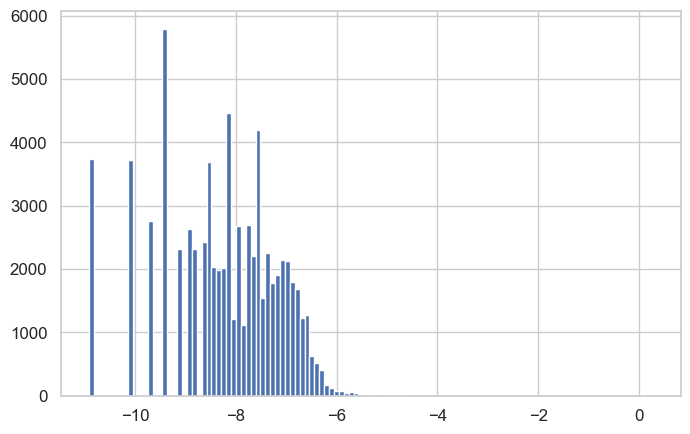

##########################  numvotes ########################## 


count    14292.000000
mean       -11.889287
std          1.978880
min        -22.324434
25%        -13.182659
50%        -11.882720
75%        -10.476537
max         -6.426563
Name: numvotes, dtype: float64

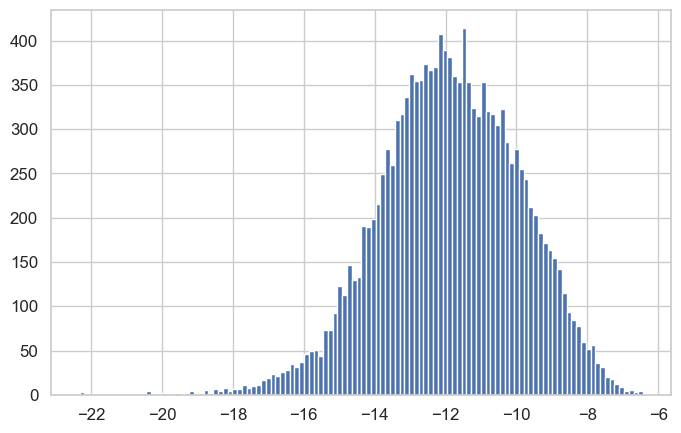

##########################  cnt_region ########################## 


count    53104.000000
mean        -2.562381
std          1.281843
min         -4.690568
25%         -3.697610
50%         -2.439694
75%         -1.551182
max          0.430548
Name: cnt_region, dtype: float64

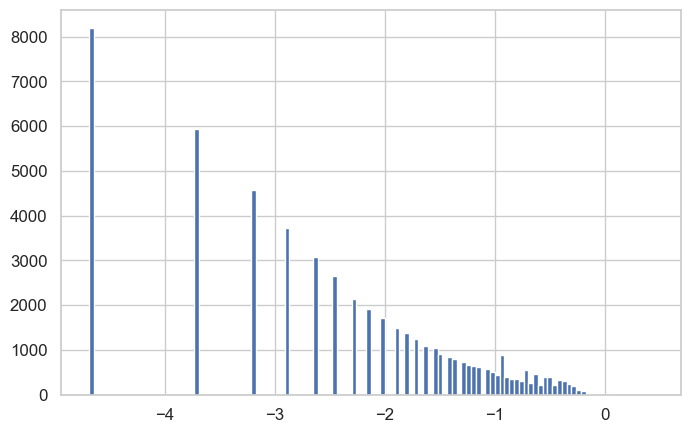

##########################  cnt_titles ########################## 


count    48829.000000
mean        -1.986234
std          1.074413
min         -3.539180
25%         -2.810401
50%         -1.873325
75%         -1.077416
max          1.029915
Name: cnt_titles, dtype: float64

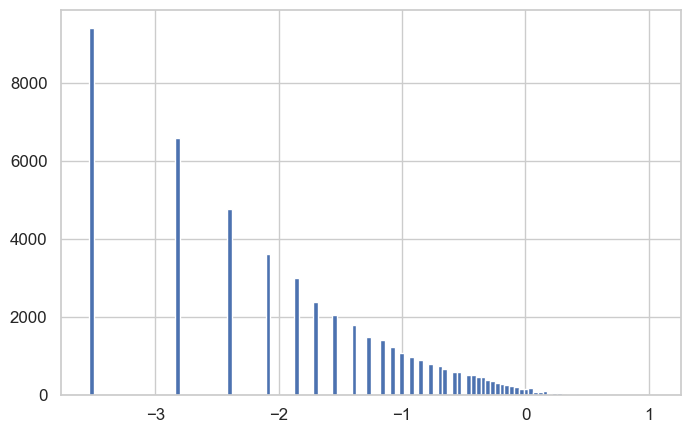

In [14]:
## Probemos ahora con la transformación log((x-x_mean)/(x_var)).
abt_transform=abt.copy()

abt_transform[col_num]=np.log((abt_transform[col_num] - abt_transform[col_num].mean())/(abt_transform[col_num].var()))

for i in col_num:
    print('##########################  %s ########################## '%i)
    display(abt_transform[i].describe())
    plt.rcParams['figure.figsize']=(8,5)
    Q1 = abt_transform[i].quantile(0.25)
    Q3 = abt_transform[i].quantile(0.75)
    IQR = Q3 - Q1
    plt.hist(abt_transform[i].dropna(),   bins= int(2*(abt[i].dropna().shape[0]**(1/3))))
    plt.show()

##El comportamiento de numvotes es mejor en esta transformacion 
## En las variables de conteos se visualiza mejor el comportamiendo de igual manera 


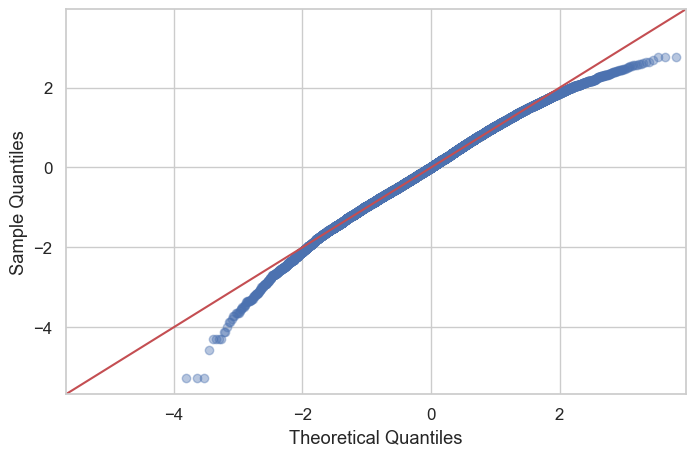

In [15]:
## qq-plots con numvotes transformado 
sm.qqplot(abt_transform['numvotes'].dropna(), fit   = True, line  = '45', alpha = 0.4, lw    = 2)
plt.show() ## En el qq-plot de numvotes hay una tendencia más lineal 

In [16]:
## Ya que encontramos la mejor transdormación para cada una de las variables 
## queda aplicarlas a nuestra tabla ABT original 
abt[['numvotes', 'cnt_titles', 'cnt_region']]=np.log((abt[['numvotes', 'cnt_titles', 'cnt_region']] - abt[['numvotes', 'cnt_titles', 'cnt_region']].mean())/(abt[['numvotes', 'cnt_titles', 'cnt_region']].var()))

C:\Users\afcal\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


C:\Users\afcal\AppData\Local\Temp\ipykernel_2112\3177301902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abt.corr()
C:\Users\afcal\AppData\Local\Temp\ipykernel_2112\3177301902.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abt.corr())


<Axes: >

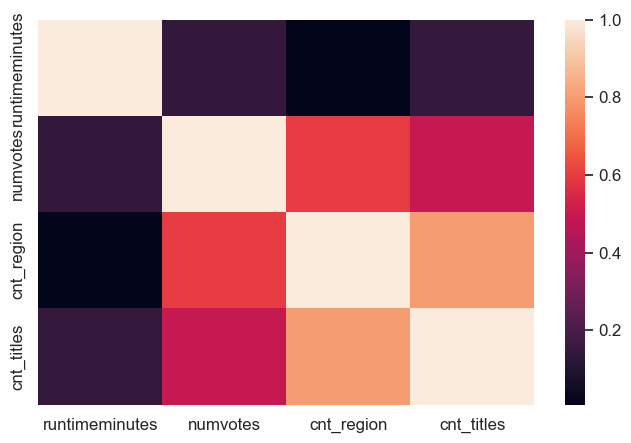

In [17]:
## Observamos la correlacion usando un heatmap 
abt.corr()
sns.heatmap(abt.corr())

## Notemos que el cnt_titles y el cnt_region está muy correlacionado 
## Estudiando el problema, esto tiene sentido porque casi para cada region hay una versíon de titulo y viceversa


Shapiro-Wilk test:
Test statistic: 0.9796068668365479
p-value: 0.12387903034687042

Anderson-Darling test:
Test statistic: 0.5333934960374904
p-values: [0.555 0.632 0.759 0.885 1.053]

Kolmogorov-Smirnov test:
Test statistic: 0.11725753106900616
p-value: 0.11793408179418197


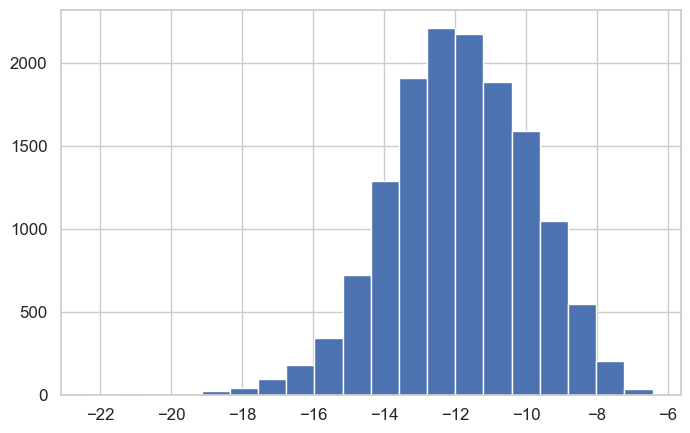

In [18]:
#Pruebas estadisticas para normalidad
plt.hist(abt['numvotes'], bins=20)
## Paquete neecsario 
from scipy import stats

## Prueba con distrib normal simulada
data =np.random.normal(loc=0, scale=1, size=100)

####### pvalue > 0.05 entonces es normal
#  Shapiro-Wilk test
shapiro_test = stats.shapiro(data)
print("Shapiro-Wilk test:")
print("Test statistic:", shapiro_test[0])
print("p-value:", shapiro_test[1])

#  Anderson-Darling test ####### pvalue > 0.05 entonces es normal
anderson_test = stats.anderson(data, dist='norm')
print("\nAnderson-Darling test:")
print("Test statistic:", anderson_test[0])
print("p-values:", anderson_test[1])

#  Kolmogorov-Smirnov test ####### pvalue > 0.05 entonces es normal
ks_test = stats.kstest(data, 'norm')
print("\nKolmogorov-Smirnov test:")
print("Test statistic:", ks_test[0])
print("p-value:", ks_test[1])

In [20]:
## Prueba de normalidad para numvotes
data = abt['numvotes'].dropna()

####### pvalue > 0.05 entonces es normal
#  Shapiro-Wilk test
shapiro_test = stats.shapiro(data)
print("Shapiro-Wilk test:")
print("Test statistic:", shapiro_test[0])
print("p-value:", shapiro_test[1])

#  Anderson-Darling test ####### pvalue > 0.05 entonces es normal
anderson_test = stats.anderson(data, dist='norm')
print("\nAnderson-Darling test:")
print("Test statistic:", anderson_test[0])
print("p-values:", anderson_test[1])

#  Kolmogorov-Smirnov test ####### pvalue > 0.05 entonces es normal
ks_test = stats.kstest(data, 'norm')
print("\nKolmogorov-Smirnov test:")
print("Test statistic:", ks_test[0])
print("p-value:", ks_test[1])

## Notemos que las pruebas de hip nos dicen que si se distribuye normal 

Shapiro-Wilk test:
Test statistic: 0.994358241558075
p-value: 3.940227377402515e-23

Anderson-Darling test:
Test statistic: 6.48920078109586
p-values: [0.576 0.656 0.787 0.918 1.092]

Kolmogorov-Smirnov test:
Test statistic: 0.9999999999347393
p-value: 0.0


Shapiro-Wilk test:
Test statistic: 0.9480738639831543
p-value: 0.0

Anderson-Darling test:
Test statistic: 678.6513223749425
p-values: [0.576 0.656 0.787 0.918 1.092]

Kolmogorov-Smirnov test:
Test statistic: 0.7278308076202902
p-value: 0.0


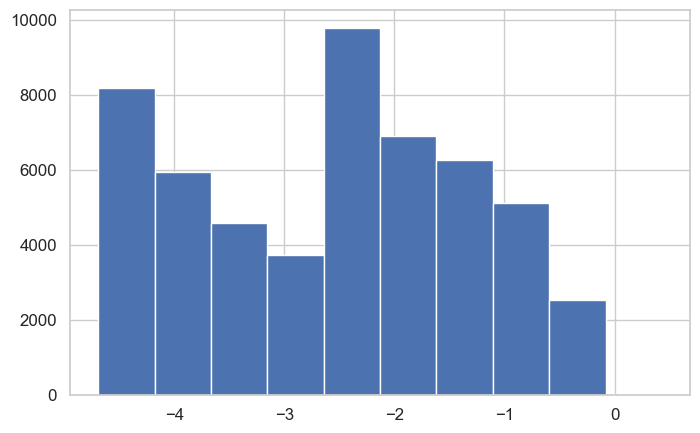

In [24]:
## Prueba de normalidad para cnt_region
plt.hist(abt['cnt_region'].dropna())

data = abt['cnt_region'].dropna()

####### pvalue > 0.05 entonces es normal
#  Shapiro-Wilk test
shapiro_test = stats.shapiro(data)
print("Shapiro-Wilk test:")
print("Test statistic:", shapiro_test[0])
print("p-value:", shapiro_test[1])

#  Anderson-Darling test ####### pvalue > 0.05 entonces es normal
anderson_test = stats.anderson(data, dist='norm')
print("\nAnderson-Darling test:")
print("Test statistic:", anderson_test[0])
print("p-values:", anderson_test[1])

#  Kolmogorov-Smirnov test ####### pvalue > 0.05 entonces es normal
ks_test = stats.kstest(data, 'norm')
print("\nKolmogorov-Smirnov test:")
print("Test statistic:", ks_test[0])
print("p-value:", ks_test[1])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
filter = (data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 *IQR)
abt_tmp1=data.loc[filter].dropna()

## Notemos que no se comporta normal segun las pruebas de hipotesis 

C:\Users\afcal\AppData\Local\Temp\ipykernel_2112\1243115611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_tmp['target']=abt_tmp['target'].astype('int')


F-statistic: 367.097518885785
p-value: 1.0241228329621046e-80


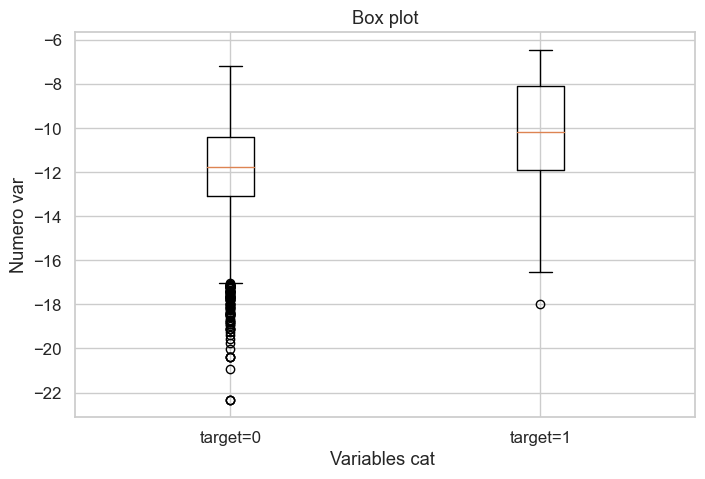

In [48]:
## Prueba ANOVA de significancia
from scipy.stats import f_oneway

abt_tmp=abt.dropna()
abt_tmp['target']=abt_tmp['target'].astype('int')

# Muestras aleatorias
n_groups = 2
group_size = 500
cat = abt_tmp['target']
cont = abt_tmp['numvotes']

# Split continuous variable by categorical variable
group1 = cont[cat == 0]
group2 = cont[cat == 1]

# Prueba ANOVA unidireccional 
f_stat, p_val = f_oneway(group1, group2)

#Resultados
print("F-statistic:", f_stat)
print("p-value:", p_val)

#si p-value>0.5 ent la hip0 no se rechaza

fig, ax = plt.subplots()
ax.boxplot([group1, group2], labels=["target=0", "target=1"])
ax.set_title("Prueba ANOVA")
ax.set_xlabel("Variables cat ")
ax.set_ylabel("Numero var")
plt.show()



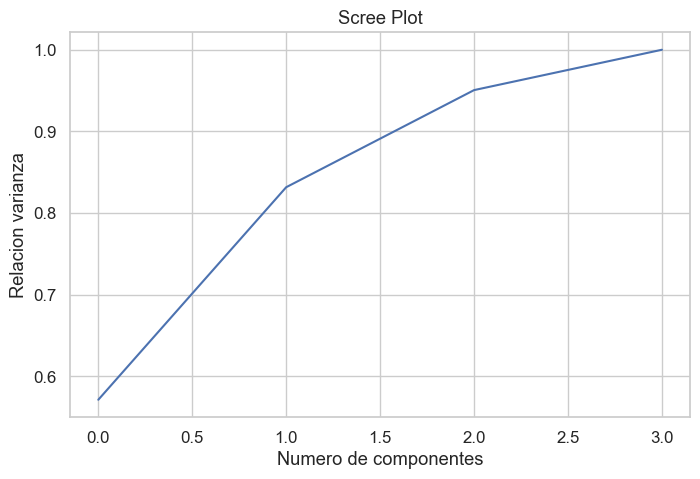

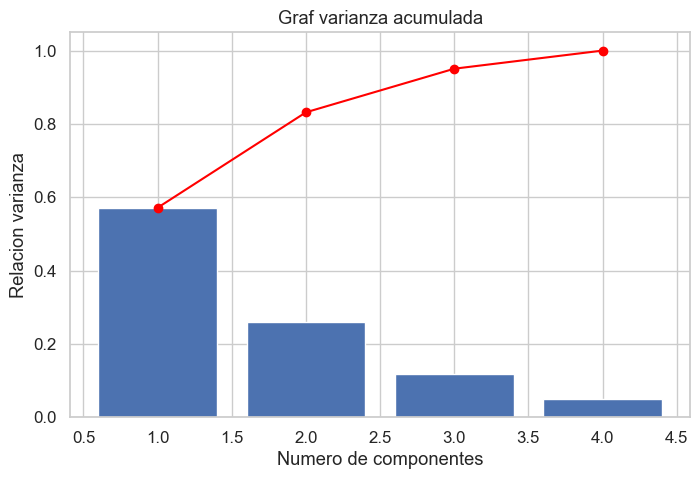

In [44]:
## Analisis de componentes principales
## PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

abt_tmp=abt.copy()
abt_tmp=abt_tmp.dropna(subset='target')
abt_tmp['target']=abt_tmp['target'].astype('int')
col_num=abt_tmp.select_dtypes(exclude=['object']).columns.tolist()

df = abt_tmp[col_num].dropna()
X = df[['runtimeminutes', 'numvotes','cnt_region', 'cnt_titles']]
y = df['target']
# Estadnarizamos los datos
X_std = StandardScaler().fit_transform(X)

# PCA con 4 componentes
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

# Graf scree de eigenvalores para reduccion de variables 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Relacion varianza')
plt.title('Scree Plot')
plt.show()

# varianza acumulada
plt.bar(range(1,5), pca.explained_variance_ratio_)
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_), c='red', marker='o')
plt.xlabel('Numero de componentes')
plt.ylabel('Relacion varianza')
plt.title('Graf varianza acumulada')
plt.show()

In [51]:
## Coeficiente de correlacion de spearman entre runtime y numvotes
## coef  entre [-1, 1]
## corr positiva(1(, negativa(-1) y nula(0)
tmp=abt[['runtimeminutes', 'numvotes']].dropna()
x=tmp['runtimeminutes'].dropna()
y=tmp['numvotes'].dropna()
# Calc del soef de spearman y p value
rho, p = spearmanr(x, y)
# resultados
print(f"Spearman correlation coefficient: {rho:.3f}")
print(f"P-value: {p:.3f}")

## No estan correlacionadas las dos variables


Spearman correlation coefficient: 0.174
P-value: 0.000


In [52]:
## Coeficiente de correlacion de spearman entre averagerating y numvotes
## coef  entre [-1, 1]
## corr positiva(1(, negativa(-1) y nula(0)
tmp=abt[['cnt_region', 'cnt_titles']].dropna()
x=tmp['cnt_region'].dropna()
y=tmp['cnt_titles'].dropna()
# Calc del coef de spearman y p value
rho, p = spearmanr(x, y)
# Resultados
print(f"Spearman correlation coefficient: {rho:.3f}")
print(f"P-value: {p:.3f}")

## Existe una gran correlación entre cnt_region y cnt_titles tal como se vio en el heatmap 

Spearman correlation coefficient: 0.836
P-value: 0.000
